In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import re
import scipy.stats as stats

import nltk
from nltk.corpus import stopwords
from pymorphy2 import MorphAnalyzer
from nltk.stem import PorterStemmer

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.probability import FreqDist

# Данные

## Чтение

In [3]:
repetitor_data_msk = pd.concat([
    pd.read_csv('data_capture/repetitor_data_msk.csv', sep=';'),
    pd.read_csv('data_capture/msk/repetitor_data_msk_1.csv', sep=';'),
    pd.read_csv('data_capture/msk/repetitor_data_msk_50_50.csv', sep=';'),
    pd.read_csv('data_capture/msk/repetitor_data_msk_50_55.csv', sep=';'),
    pd.read_csv('data_capture/msk/repetitor_data_msk_50_60.csv', sep=';'),
    pd.read_csv('data_capture/msk/repetitor_data_msk_50_65.csv', sep=';'),
    pd.read_csv('data_capture/msk/repetitor_data_msk_50_70.csv', sep=';'),
    pd.read_csv('data_capture/msk/repetitor_data_msk_50_75.csv', sep=';'),
    pd.read_csv('data_capture/msk/repetitor_data_msk_50_80.csv', sep=';')
    ], axis=0)

In [4]:
repetitor_data_spb = pd.read_csv('data_capture/repetitor_data_spb.csv', sep=';')
repetitor_data_ekt = pd.read_csv('data_capture/repetitor_data_ekt.csv', sep=';')
repetitor_data_ksdr = pd.read_csv('data_capture/repetitor_data_ksdr.csv', sep=';')
repetitor_data_kzn = pd.read_csv('data_capture/repetitor_data_kzn.csv', sep=';')
repetitor_data_nnov = pd.read_csv('data_capture/repetitor_data_nnov.csv', sep=';')
repetitor_data_rnd = pd.read_csv('data_capture/repetitor_data_rnd.csv', sep=';')

In [5]:
repetitors = pd.concat([
    repetitor_data_msk,
    repetitor_data_spb,
    repetitor_data_ekt,
    repetitor_data_ksdr,
    repetitor_data_kzn,
    repetitor_data_nnov,
    repetitor_data_rnd
    ], axis=0)
repetitors[:5]

,Link,Name,Description,Mark,Subject,Experience
0,https://msk.repetitors.info/repetitor/?p=Tyuri...,Тюрина Мария Александровна,Выбрать Тюрина Мария Александровна Проводит ди...,"оценка 5,00 28 отзывов $$$$",английский язык,Небольшой опыт
1,https://msk.repetitors.info/repetitor/?p=Glazy...,Глазырина Вероника Вадимовна,Выбрать Глазырина Вероника Вадимовна Проводит ...,"оценка 5,00 13 отзывов $$$$",английский язык,Небольшой опыт
2,https://msk.repetitors.info/repetitor/?p=Koval...,Ковалева Татьяна Борисовна,Выбрать Ковалева Татьяна Борисовна Проводит ди...,"оценка 5,00 15 отзывов $$$$",английский язык,Небольшой опыт
3,https://msk.repetitors.info/repetitor/?p=Yakim...,Якимова Ульяна Вячеславовна,Выбрать Якимова Ульяна Вячеславовна Проводит д...,"оценка 4,91 34 отзыва $$$$",английский язык,Небольшой опыт
4,https://msk.repetitors.info/repetitor/?p=RyabyhAM,Рябых Артем Михайлович,Выбрать Рябых Артем Михайлович Проводит дистан...,"оценка 5,00 17 отзывов $$$$",английский язык,Небольшой опыт


In [5]:
len(repetitors)

190284

In [6]:
repetitors = repetitors.reset_index(drop=True)
repetitors.rename(columns = {'Link': 'link', 'Name': 'name', 
                             'Description': 'description', 'Mark': 'mark',
                             'Subject': 'subject', 'Experience': 'experience'}, inplace = True)

In [7]:
# Добавим город (ставка очень зависит от того, мск/спб это или иной город)
repetitors['city'] = 'Москва'
repetitors.city[len(repetitor_data_msk)+len(repetitor_data_spb):] = 'Регионы'

repetitors[len(repetitor_data_msk)+len(repetitor_data_spb) - 2:
           len(repetitor_data_msk)+len(repetitor_data_spb) + 2]

,link,name,description,mark,subject,experience,city
153742,https://spb.repetitors.info/repetitor/?p=Koste...,Костенко Ольга Васильевна,Приостановила набор новых учеников. Выбрать Ко...,"оценка 4,00 4 отзыва $$$$",подготовка к школе,Преподаватель вуза,Москва
153743,https://spb.repetitors.info/repetitor/?p=Travi...,Травина Алла Александровна,Выбрать Травина Алла Александровна Репетитор п...,$$$$,подготовка к школе,Преподаватель вуза,Москва
153744,https://ekt.repetitors.info/repetitor/?p=MysinaMA,Мысина Мария Алексеевна,Приостановила набор новых учеников до 1 июня. ...,"оценка 4,94 18 отзывов $$$$",математика,Небольшой опыт,Регионы
153745,https://ekt.repetitors.info/repetitor/?p=Kormy...,Кормышев Николай Викторович,Выбрать Кормышев Николай Викторович Репетитор ...,"оценка 4,62 26 отзывов $$$$",математика,Небольшой опыт,Регионы


In [8]:
# Перемешаем данные
repetitors = repetitors.sample(frac=1).reset_index(drop=True)

In [9]:
repetitors.dtypes

link           object
name           object
description    object
mark           object
subject        object
experience     object
city           object
dtype: object

In [10]:
repetitors = repetitors.astype({'link': str, 'name': str, 'description': str, 'mark': str, 'subject': str,
                               'experience': str, 'city': str})

In [11]:
# Проверим на null значения
pd.isnull(repetitors).sum()

link           0
name           0
description    0
mark           0
subject        0
experience     0
city           0
dtype: int64

In [12]:
# Удалим дубликаты по всем столбцам
repetitors = repetitors.drop_duplicates().reset_index(drop=True)

In [13]:
len(repetitors)

148022

## Столбец link

In [14]:
len(np.unique(repetitors['link'])) == len(repetitors)

False

In [15]:
repetitors['link'].value_counts()

https://repetitors.info/repetitor/?p=YaroslavtsevVU        78
https://repetitors.info/repetitor/?p=VasilevAA2            78
https://repetitors.info/repetitor/?p=ShevchenkoUA          78
https://repetitors.info/repetitor/?p=KulakovaAV            78
https://repetitors.info/repetitor/?p=KonovAB               78
                                                           ..
https://spb.repetitors.info/repetitor/?p=SogrinaEP          1
https://spb.repetitors.info/repetitor/?p=VolkovaVS6         1
https://kzn.repetitors.info/repetitor/?p=NaimushinaPV       1
https://msk.repetitors.info/repetitor/?p=KuchevaMN          1
https://msk.repetitors.info/repetitor/?p=HuziahmetovaAR     1
Name: link, Length: 98447, dtype: int64

In [17]:
# Удалим дубликаты по столбцу ссылки
repetitors = repetitors[~repetitors.duplicated(subset = 'link')].reset_index(drop=True)

In [18]:
len(np.unique(repetitors['link'])) == len(repetitors)

True

In [19]:
rep = repetitors.copy(deep=True)
len(repetitors)

98447

## Столбцы subject & experience & city

In [20]:
np.unique(repetitors['subject'])

array(['английский язык', 'биология', 'география', 'информатика',
       'испанский язык', 'история', 'итальянский язык', 'китайский язык',
       'литература', 'математика', 'музыка', 'начальная школа',
       'немецкий язык', 'обществознание', 'подготовка к школе',
       'программирование', 'русский язык', 'физика', 'французский язык',
       'химия', 'экономика', 'японский язык'], dtype=object)

Разобьем предметы на группы: "естественно-научные", "гуманитарные", "языки", "нач.классы"

In [21]:
repetitors['subject_name'] = 'науки'

# естественно-научные предметы
repetitors.loc[(repetitors['subject'] == 'математика')|
               (repetitors['subject'] == 'информатика')|
               (repetitors['subject'] == 'физика')|
               (repetitors['subject'] == 'программирование')|
               (repetitors['subject'] == 'химия')|
               (repetitors['subject'] == 'биология'), 'subject'] = 1

repetitors.loc[(repetitors['subject'] == 1),'subject_name'] = 'естественно-научные'

# гуманитарные предметы
repetitors.loc[(repetitors['subject'] == 'география')|
               (repetitors['subject'] == 'история')|
               (repetitors['subject'] == 'русский язык')|
               (repetitors['subject'] == 'экономика')|
               (repetitors['subject'] == 'обществознание')|
               (repetitors['subject'] == 'литература'), 'subject'] = 2

repetitors.loc[(repetitors['subject'] == 2),'subject_name'] = 'гуманитарные'

# языки
repetitors.loc[(repetitors['subject'] == 'английский язык')|
               (repetitors['subject'] == 'немецкий язык')|
               (repetitors['subject'] == 'французский язык')|
               (repetitors['subject'] == 'китайский язык')|
               (repetitors['subject'] == 'испанский язык')|
               (repetitors['subject'] == 'итальянский язык')|
               (repetitors['subject'] == 'японский язык'), 'subject'] = 3

repetitors.loc[(repetitors['subject'] == 3),'subject_name'] = 'языки'


# начальные классы / подготовка к школе
repetitors.loc[(repetitors['subject'] == 'начальная школа')|
               (repetitors['subject'] == 'подготовка к школе')|
               (repetitors['subject'] == 'музыка'), 'subject'] = 4

repetitors.loc[(repetitors['subject'] == 4),'subject_name'] = 'нач.кассы'

In [22]:
np.unique(repetitors['subject_name'])

array(['гуманитарные', 'естественно-научные', 'нач.кассы', 'языки'],
      dtype=object)

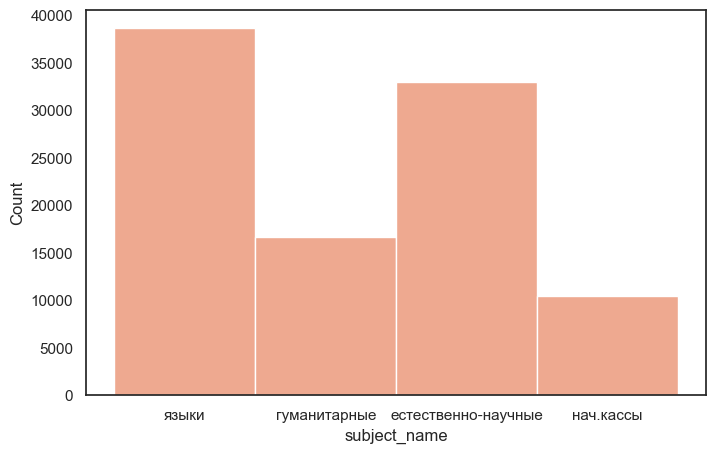

In [23]:
# Гистограмма частот
sns.set_theme(style="white", palette='flare',rc={"figure.figsize":(8,5)})
sns_plot = sns.histplot(repetitors['subject_name'])

Разобьем опыт на группы: "Небольшой опыт", "Средний опыт", "Большой опыт"

In [24]:
np.unique(repetitors['experience'])

array(['Небольшой опыт', 'Преподаватель вуза', 'Преподаватель курсов',
       'Профессор', 'Репетитор-эксперт', 'Серьёзный опыт', 'Средний опыт',
       'Школьный учитель'], dtype=object)

In [25]:
repetitors['experience_name'] = 'опыт'

# небольшой опыт
repetitors.loc[(repetitors['experience'] == 'Небольшой опыт'), 'experience'] = 1

repetitors.loc[(repetitors['experience'] == 1),'experience_name'] = 'Небольшой опыт'

# средний опыт
repetitors.loc[(repetitors['experience'] == 'Средний опыт'), 'experience'] = 2

repetitors.loc[(repetitors['experience'] == 2),'experience_name'] = 'Средний опыт'


# большой опыт
repetitors.loc[(repetitors['experience'] == 'Серьёзный опыт')|
              (repetitors['experience'] == 'Преподаватель вуза')|
              (repetitors['experience'] == 'Репетитор-эксперт')|
              (repetitors['experience'] == 'Профессор')|
              (repetitors['experience'] == 'Школьный учитель')|
               (repetitors['experience'] == 'Преподаватель курсов'), 'experience'] = 3

repetitors.loc[(repetitors['experience'] == 3),'experience_name'] = 'Большой опыт'



In [26]:
np.unique(repetitors['experience_name'])

array(['Большой опыт', 'Небольшой опыт', 'Средний опыт'], dtype=object)

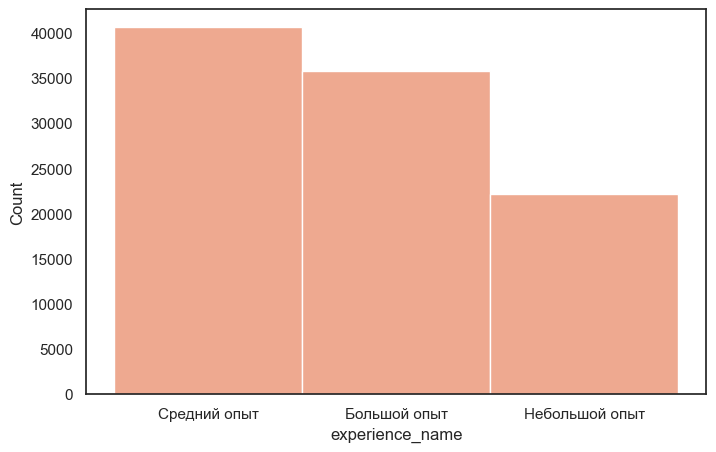

In [27]:
sns.set_theme(style="white", palette='flare')
sns_plot = sns.histplot(repetitors, x = 'experience_name')

In [28]:
np.unique(repetitors['city'])

array(['Москва', 'Регионы'], dtype=object)

In [29]:
repetitors['city_name'] = 'город'

# Регион
repetitors.loc[(repetitors['city'] == 'Регионы'), 'city'] = 1
repetitors.loc[(repetitors['city'] == 1),'city_name'] = 'Регион'

# Москва
repetitors.loc[(repetitors['city'] == 'Москва'), 'city'] = 2
repetitors.loc[(repetitors['city'] == 2),'city_name'] = 'Москва'

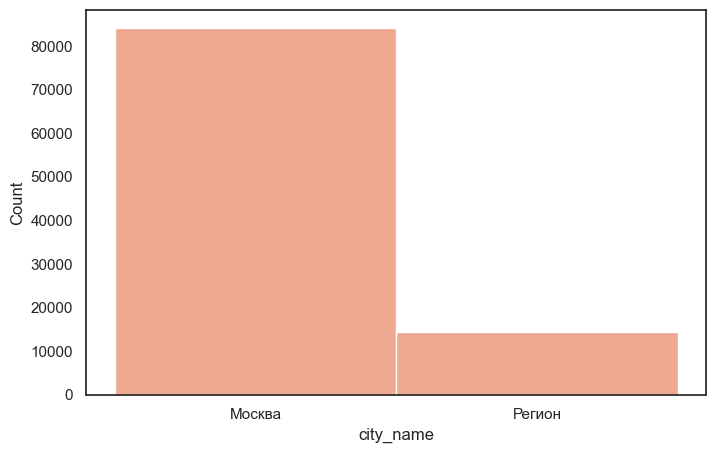

In [30]:
sns.set_theme(style = 'white', palette = 'flare')
sns_plot = sns.histplot(repetitors, x = 'city_name')

In [32]:
repetitors[:1]

,link,name,description,mark,subject,experience,city,subject_name,experience_name,city_name
0,https://msk.repetitors.info/repetitor/?p=Chzhu...,Чжу Юцзя,Выбрать Чжу Юцзя Проводит дистанционные заняти...,$$$$,3,2,2,языки,Средний опыт,Москва


## Столбцы review_count & mark

In [33]:
# Создадим столбец оценки
repetitors['review_count'] = repetitors.mark

In [34]:
repetitors[:3]

,link,name,description,mark,subject,experience,city,subject_name,experience_name,city_name,review_count
0,https://msk.repetitors.info/repetitor/?p=Chzhu...,Чжу Юцзя,Выбрать Чжу Юцзя Проводит дистанционные заняти...,$$$$,3,2,2,языки,Средний опыт,Москва,$$$$
1,https://spb.repetitors.info/repetitor/?p=Oshly...,Ошлыкова Ольга Борисовна,Выбрать Ошлыкова Ольга Борисовна Репетитор по ...,"оценка 4,67 3 отзыва $$$$",2,3,2,гуманитарные,Большой опыт,Москва,"оценка 4,67 3 отзыва $$$$"
2,https://msk.repetitors.info/repetitor/?p=Bredk...,Бредкина Александра Геннадьевна,Выбрать Бредкина Александра Геннадьевна Репети...,"оценка 5,00 1 отзыв $$$$",2,1,2,гуманитарные,Небольшой опыт,Москва,"оценка 5,00 1 отзыв $$$$"


In [35]:
# Регулярными выражениями выделим оценку и количество отзывов
for i in range(len(repetitors)):
    reviews = re.findall(" \d{,4} ", repetitors['mark'][i])
    mark = re.findall("\d,\d\d", repetitors['mark'][i])
    if len(reviews) != 0:
        repetitors['review_count'][i] = int(reviews[0])
    else: repetitors['review_count'][i] = 0
    if len(mark) != 0:
        repetitors['mark'][i] = float(mark[0].replace(',','.'))
    else: repetitors['mark'][i] = 0.0

In [36]:
# Какой процент составляют 0 оценки от всей выборки
len(repetitors[repetitors['mark']==0])*100/len(repetitors)

32.061921643117614

In [37]:
# Какой процент составляют 0 отзывов от всей выборки
len(repetitors[repetitors['review_count']==0])*100/len(repetitors)

32.061921643117614

In [38]:
repetitors[:2]

,link,name,description,mark,subject,experience,city,subject_name,experience_name,city_name,review_count
0,https://msk.repetitors.info/repetitor/?p=Chzhu...,Чжу Юцзя,Выбрать Чжу Юцзя Проводит дистанционные заняти...,0.0,3,2,2,языки,Средний опыт,Москва,0
1,https://spb.repetitors.info/repetitor/?p=Oshly...,Ошлыкова Ольга Борисовна,Выбрать Ошлыкова Ольга Борисовна Репетитор по ...,4.67,2,3,2,гуманитарные,Большой опыт,Москва,3


## Столбцы price & description

In [40]:
# Процент описаний со словом Выбрать
(repetitors['description'].str.contains(r'Выбрать').sum() * 100)/len(repetitors)

100.0

In [41]:
repetitors = repetitors[repetitors['name'] != 'nan'].reset_index(drop=True)

In [42]:
# Количество репетиторов, у которых нет ставки (цены)
len(repetitors) - repetitors['description'].str.contains(r'Цены').sum()

69

In [43]:
# Удалим их
repetitors = repetitors[repetitors['description'].str.contains(r'Цены')].reset_index(drop=True)

In [44]:
# Создаем новый столбец со ставкой репетитора
repetitors['price'] = repetitors['description']

In [45]:
# Заполняем его столбцами со ставками и продолжительность занятий, а из description удаляем эту информацию
for i in range(len(repetitors)):
    index_price = repetitors['description'][i].find('Цены')
    repetitors['price'][i] = repetitors['description'][i][index_price:]
    repetitors['description'][i] = repetitors['description'][i][:index_price]

In [46]:
repetitors[:3]

,link,name,description,mark,subject,experience,city,subject_name,experience_name,city_name,review_count,price
0,https://msk.repetitors.info/repetitor/?p=Chzhu...,Чжу Юцзя,Выбрать Чжу Юцзя Проводит дистанционные заняти...,0.0,3,2,2,языки,Средний опыт,Москва,0,Цены и варианты занятий Китайский язык: 1500 р...
1,https://spb.repetitors.info/repetitor/?p=Oshly...,Ошлыкова Ольга Борисовна,Выбрать Ошлыкова Ольга Борисовна Репетитор по ...,4.67,2,3,2,гуманитарные,Большой опыт,Москва,3,Цены и варианты занятий Литература: 1000 руб. ...
2,https://msk.repetitors.info/repetitor/?p=Bredk...,Бредкина Александра Геннадьевна,Выбрать Бредкина Александра Геннадьевна Репети...,5.0,2,1,2,гуманитарные,Небольшой опыт,Москва,1,Цены и варианты занятий Ставка: 1000 руб. / ч ...


In [47]:
# Процент стоимости, с блоком 'руб. / ч'
round(repetitors['price'].str.contains(r'руб. / ч').sum() * 100 / len(repetitors))

93

In [48]:
# остальные - это рубли в ак.час или в 45/50 минут
for i in repetitors[~repetitors['price'].str.contains(r'руб. / ч')][:5].price:
    print(i)

Цены и варианты занятий Физика: 500 руб. / 45 мин. Химия: 500 руб. / 45 мин. ОГЭ по химии: 550 руб. / 45 мин. Длительность занятия: 45 мин.
Цены и варианты занятий Ставка: 400 руб. / 45 мин. ОГЭ по русскому языку: 700 руб. / 45 мин. ЕГЭ по русскому языку: 700 руб. / 45 мин.
Цены и варианты занятий Английский язык: 600 руб. / 45 мин. Выезд: 700 руб. / 45 мин. Длительность занятия: 45 мин.
Цены и варианты занятий Музыка: 600-800 руб. / 45 мин. Подготовка в музыкальную школу: 800 руб. / 45 мин. Подготовка в музыкальное училище: 800 руб. / 45 мин. Длительность занятия: 45 мин.
Цены и варианты занятий Математика: 900 руб. / 45 мин.


In [49]:
# Удалим их, оставим только руб/ч
repetitors = repetitors[repetitors['price'].str.contains(r'руб. / ч')].reset_index(drop=True)

In [50]:
# Процент описаний стоимости, с блоком 'Цены и варианты занятий', чтобы убедиться в его успешном удалении
repetitors['price'].str.contains(r'Цены и варианты занятий').sum() * 100 / len(repetitors)

100.0

In [51]:
# создадим столбец средней ставки
repetitors['price_avg'] = repetitors.price

In [52]:
# Будем рассматривать только цены < 12000 и начиная с трехзначных. 
# Если все цены больше этой суммы, то удаляем строку
delete_list = []

for i in range(len(repetitors)):
    price_list = re.findall("\d{3,}", repetitors['price'][i])
    price_sum = 0
    len_list = 0
    for price in price_list:
        if int(price) < 12000: 
            price_sum += int(price)
            len_list += 1
    if len_list != 0: repetitors['price_avg'][i] = int(price_sum / len_list)
    else: delete_list.append(i)
        
pd.options.mode.chained_assignment = None

In [53]:
# лист, в котором находятся индексы строк для удаления
len(delete_list)

3

In [54]:
# Удалим их
repetitors = repetitors.drop(labels = delete_list,axis = 0).reset_index(drop=True)

### Работа с выбросами

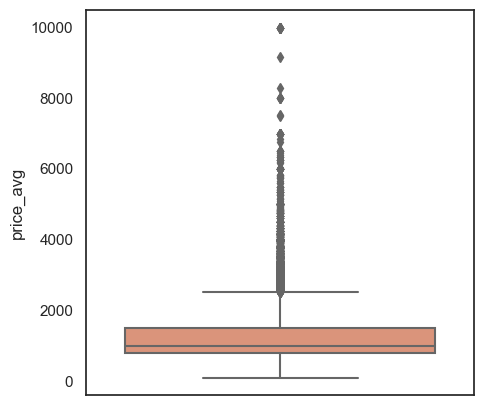

In [55]:
sns.set_theme(style="white", palette='flare',rc={"figure.figsize":(5,5)})
sns.boxplot(repetitors, y='price_avg')
plt.show()

<AxesSubplot: xlabel='price_avg', ylabel='Count'>

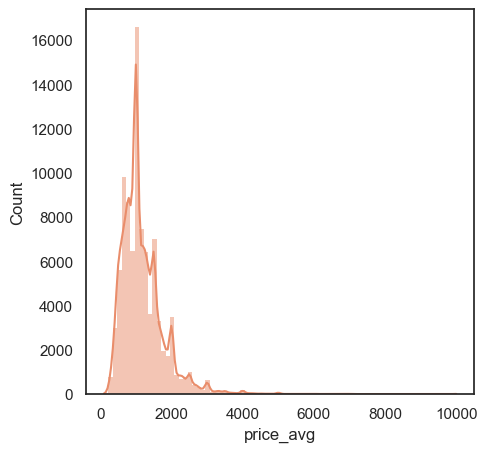

In [56]:
sns.histplot(repetitors['price_avg'], kde=True, stat="count", linewidth=0, bins=80)

In [57]:
Q1 = repetitors['price_avg'].quantile(q=.2)
Q3 = repetitors['price_avg'].quantile(q=.8)
IQR = repetitors['price_avg'].apply(stats.iqr)

repetitors = repetitors[~((repetitors['price_avg'] < (Q1-1.5*IQR)) | 
                                (repetitors['price_avg'] > (Q3+1.5*IQR)))]

In [59]:
repetitors['price_avg'] = pd.to_numeric(repetitors['price_avg']).astype('float64')

<AxesSubplot: xlabel='price_avg', ylabel='Count'>

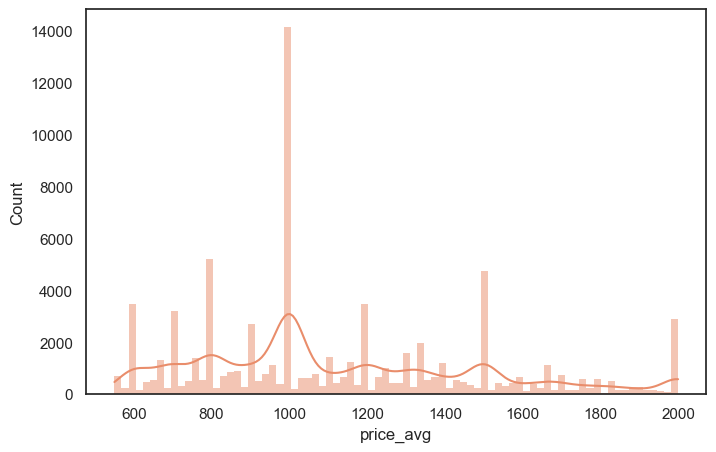

In [4]:
sns.set_theme(style="white", palette='flare',rc={"figure.figsize":(8,5)})
sns.histplot(repetitors['price_avg'], kde=True, stat="count", linewidth=0, bins=80)

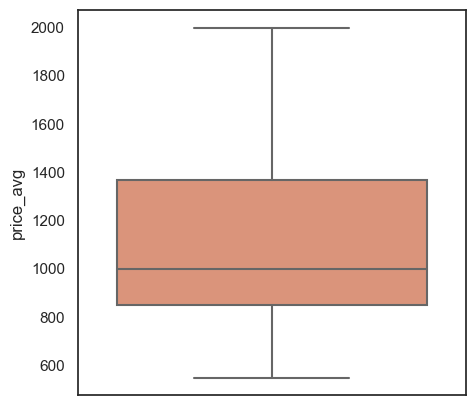

In [5]:
sns.set_theme(style="white", palette='flare',rc={"figure.figsize":(5,5)})
sns.boxplot(repetitors, y='price_avg')
plt.show()

In [63]:
len(repetitors)

86821

## Types

In [65]:
repetitors['subject'] = pd.to_numeric(repetitors['subject']).astype('float64')
repetitors['experience'] = pd.to_numeric(repetitors['experience']).astype('float64')
repetitors['city'] = pd.to_numeric(repetitors['city']).astype('float64')
repetitors['review_count'] = pd.to_numeric(repetitors['review_count']).astype('float64')
repetitors['price_avg'] = pd.to_numeric(repetitors['price_avg']).astype('float64')
repetitors['mark'] = pd.to_numeric(repetitors['mark']).astype('float64')

In [66]:
repetitors.dtypes

link                object
name                object
description         object
mark               float64
subject            float64
experience         float64
city               float64
subject_name        object
experience_name     object
city_name           object
review_count       float64
price               object
price_avg          float64
dtype: object

## Графический анализ

<AxesSubplot: xlabel='price_avg', ylabel='Count'>

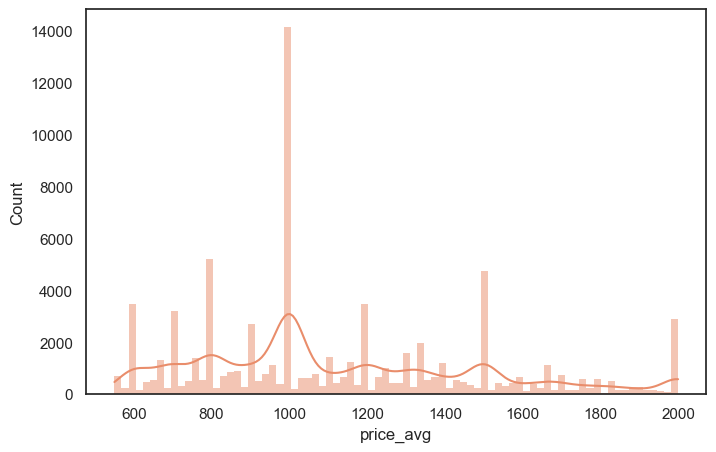

In [6]:
sns.set_theme(style="white", palette='flare',rc={"figure.figsize":(8,5)})
sns.histplot(repetitors['price_avg'], kde=True, stat="count", linewidth=0, bins=80)

<AxesSubplot: xlabel='city_name', ylabel='price_avg'>

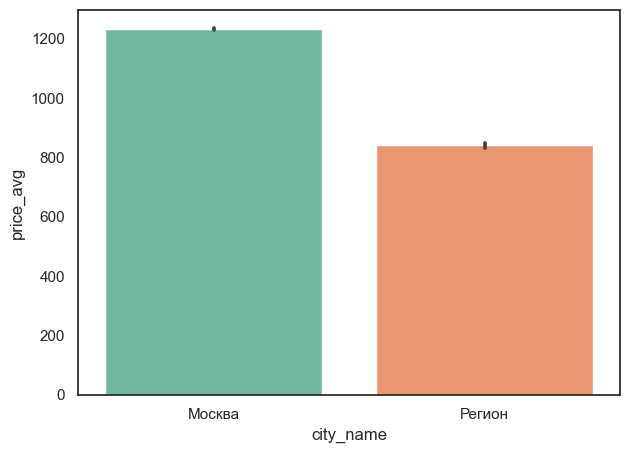

In [70]:
sns.set_theme(style="white", palette='Set2', rc={"figure.figsize":(7,5)})
sns.barplot(data=repetitors, x='city_name', y='price_avg')

<AxesSubplot: xlabel='subject_name', ylabel='price_avg'>

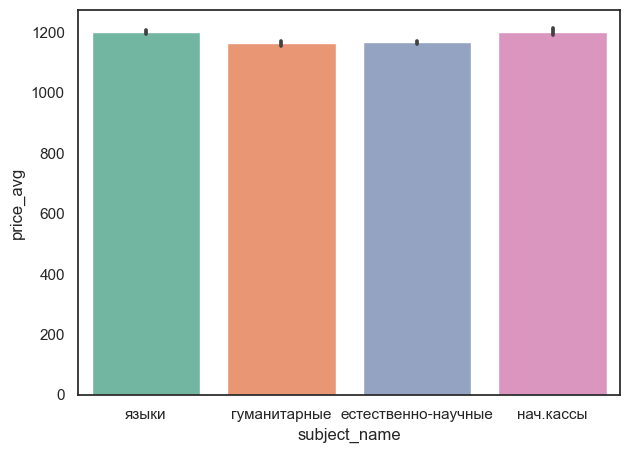

In [71]:
sns.barplot(data=repetitors, x='subject_name', y='price_avg')

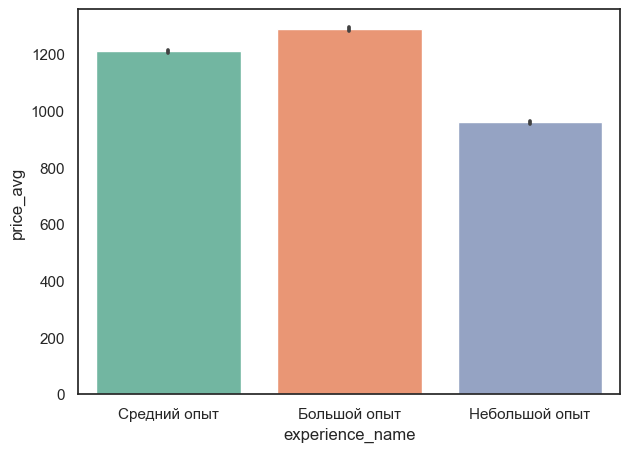

In [72]:
sns_plot = sns.barplot(data=repetitors, x='experience_name', y='price_avg')

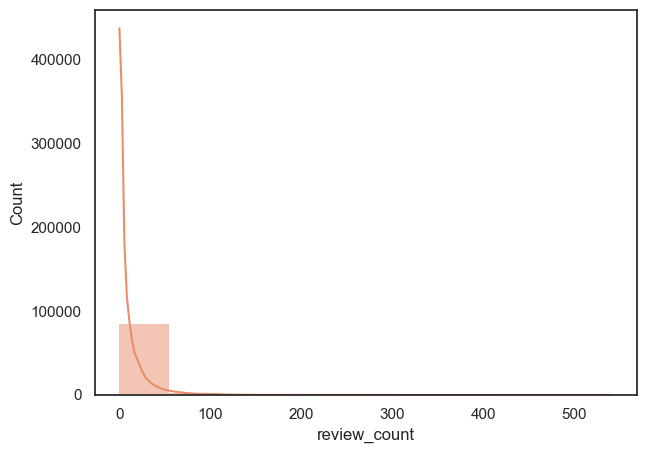

In [73]:
sns.set_theme(style="white", palette='flare')
sns_plot = sns.histplot(repetitors['review_count'], kde=True, stat="count",linewidth=0,bins=10)

In [74]:
repetitors.loc[repetitors['review_count'] > 50, 'review_count'] = 50

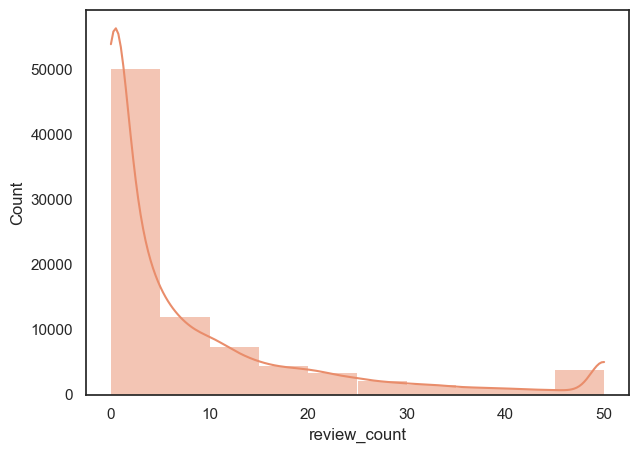

In [75]:
sns.set_theme(style="white", palette='flare')
sns_plot = sns.histplot(repetitors['review_count'], kde=True, stat="count",linewidth=0,bins=10)

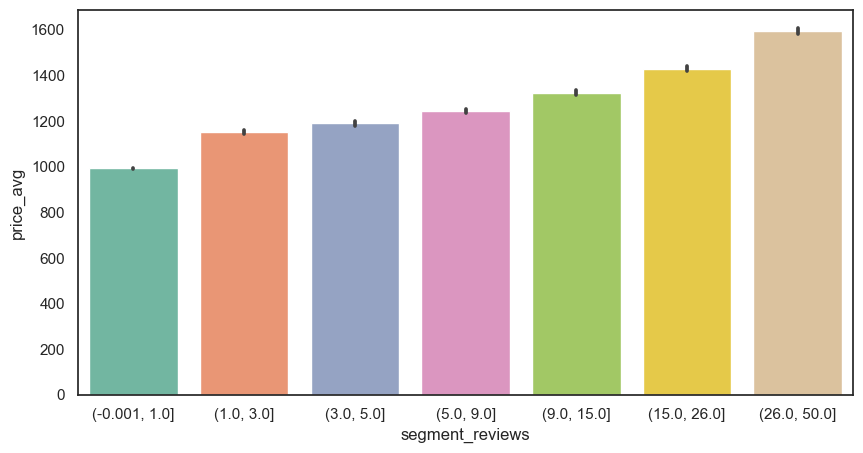

In [87]:
# sns.set_theme(style="white", palette='Set2')
repetitors['segment_reviews'] = pd.qcut(repetitors.review_count, q=10, duplicates='drop')

plt.figure(figsize=(10,5))
sns_plot = sns.barplot(data=repetitors, x='segment_reviews', y="price_avg")
plt.show()

<AxesSubplot: xlabel='segment_mark', ylabel='price_avg'>

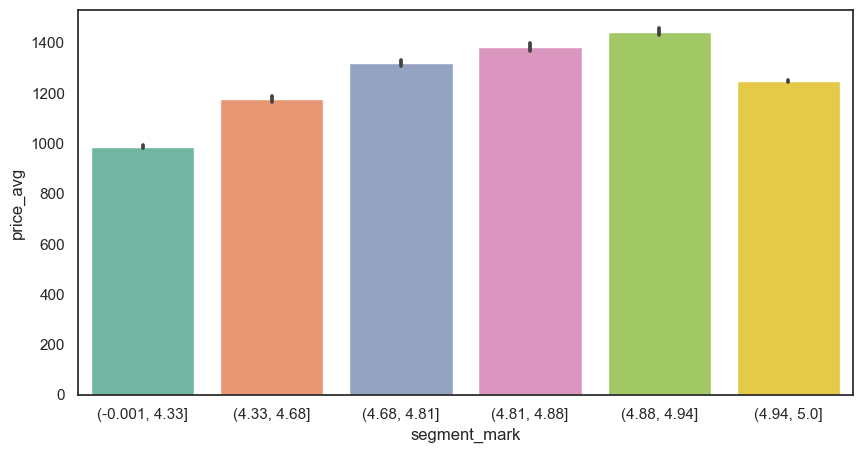

In [76]:
sns.set_theme(style="white", palette='Set2', rc={"figure.figsize":(7,5)})
repetitors['segment_mark'] = pd.qcut(repetitors.mark, q=15, duplicates='drop')

plt.figure(figsize=(10,5))
sns.barplot(data=repetitors, x='segment_mark', y="price_avg")

## Столбец description

In [90]:
# Загрузим русский список стоп-слов
nltk.download('stopwords')
stopwords_ru = stopwords.words("russian")

[nltk_data] Error loading stopwords: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>


Создадим функцию preprocessing, с помощью которой будем предобрабатывать наши описания, а именно: 
1. разбивать на токены
2. приводить к нормальной форме
3. удалять стоп-слова

In [91]:
patterns = r'[^А-Яа-яЁё]'
morph = MorphAnalyzer()
stemmer = PorterStemmer()
stop_descr_words = ['приостановить', 'набор', 'новый', 'ученик', 'выбрать','репетитор',
                    'предмет','год', 'язык', 'занятие', 'учитель']

def preprocessing(doc):
    doc = re.sub(patterns, ' ', doc)
    string = ''
    for token in doc.split():
        if token:
            token = token.strip()
            token = morph.normal_forms(token)[0]
            token = stemmer.stem(token)
            if token not in stopwords_ru and token not in stop_descr_words and len(token) > 1:
                string += token + ' '
    if len(string.split()) > 7:
        return string
    return None

In [92]:
repetitors['descr_preproc'] = repetitors.description.apply(preprocessing)

In [93]:
# В descr_preproc у нас появились None значения, засчет того, что после обработки description мы отсекали 
# короткие предложения (<7 слов)
# Удалим nan значения 
repetitors = repetitors.drop(repetitors[pd.isnull(repetitors.descr_preproc)].index, 
                             axis=0).reset_index(drop=True)

## Кодирование One-Hot Encoding
Закодируем категориальные переменные city,subject,number_of_reviews

In [94]:
repetitors = pd.get_dummies(repetitors, columns=['city', 'experience', 'subject'])
repetitors[:2]

,link,name,description,mark,subject_name,experience_name,city_name,review_count,price,price_avg,...,descr_preproc,city_1.0,city_2.0,experience_1.0,experience_2.0,experience_3.0,subject_1.0,subject_2.0,subject_3.0,subject_4.0
0,https://msk.repetitors.info/repetitor/?p=Chzhu...,Чжу Юцзя,Выбрать Чжу Юцзя Проводит дистанционные заняти...,0.00,языки,Средний опыт,Москва,0.0,Цены и варианты занятий Китайский язык: 1500 р...,1700.0,...,чжу юцзить проводить дистанционный китайский о...,0,1,0,1,0,0,0,1,0
1,https://spb.repetitors.info/repetitor/?p=Oshly...,Ошлыкова Ольга Борисовна,Выбрать Ошлыкова Ольга Борисовна Репетитор по ...,4.67,гуманитарные,Большой опыт,Москва,3.0,Цены и варианты занятий Литература: 1000 руб. ...,866.0,...,ошлыковый ольга борисович литература образован...,0,1,0,0,1,0,1,0,0


In [95]:
repetitors = repetitors.rename(columns={'city_1.0': 'region','city_2.0': 'msk',
                                        'experience_1.0': 'beginner','experience_2.0': 'middle', 'experience_3.0': 'expert',
                                        'subject_1.0': 'math','subject_2.0': 'hum', 
                                        'subject_3.0': 'language','subject_4.0': 'elementary'})

In [96]:
repetitors[100:103]

,link,name,description,mark,subject_name,experience_name,city_name,review_count,price,price_avg,...,descr_preproc,region,msk,beginner,middle,expert,math,hum,language,elementary
100,https://msk.repetitors.info/repetitor/?p=Petru...,Петрухно Михаил Вадимович,Выбрать Петрухно Михаил Вадимович Предметы: ма...,5.0,естественно-научные,Средний опыт,Москва,5.0,Цены и варианты занятий Программирование: 750 ...,750.0,...,петрухно михаил вадимович математик физика инф...,0,1,0,1,0,1,0,0,0
101,https://msk.repetitors.info/repetitor/?p=Kraso...,Красовская Лидия Фёдоровна,Выбрать Красовская Лидия Фёдоровна Проводит ди...,5.0,гуманитарные,Большой опыт,Москва,23.0,Цены и варианты занятий Ставка: 1800 руб. / ч ...,2100.0,...,красовский лидия фёдорович проводить дистанцио...,0,1,0,0,1,0,1,0,0
102,https://msk.repetitors.info/repetitor/?p=PanevAS,Панёв Александр Сергеевич,Выбрать Панёв Александр Сергеевич Предметы: ма...,5.0,естественно-научные,Большой опыт,Москва,4.0,Цены и варианты занятий Математика: 2000 руб. ...,2000.0,...,панёв александр сергеевич математик высокий ма...,0,1,0,0,1,1,0,0,0


In [97]:
repetitors = repetitors.astype({'region': 'float64', 'msk': 'float64','beginner': 'float64',
                                'middle': 'float64','expert': 'float64','math': 'float64',
                                'hum': 'float64','language': 'float64','elementary': 'float64',})

In [98]:
repetitors = repetitors[['price_avg'] + [x for x in repetitors.columns if x != 'price_avg']]

In [99]:
repetitors = repetitors.drop(['region'], axis=1)

## Проверка на коллинеарность

In [100]:
repetitors_without_descr = repetitors.drop(['link','name','description',
                                            'subject_name','experience_name','city_name',
                                            'price'], axis=1)

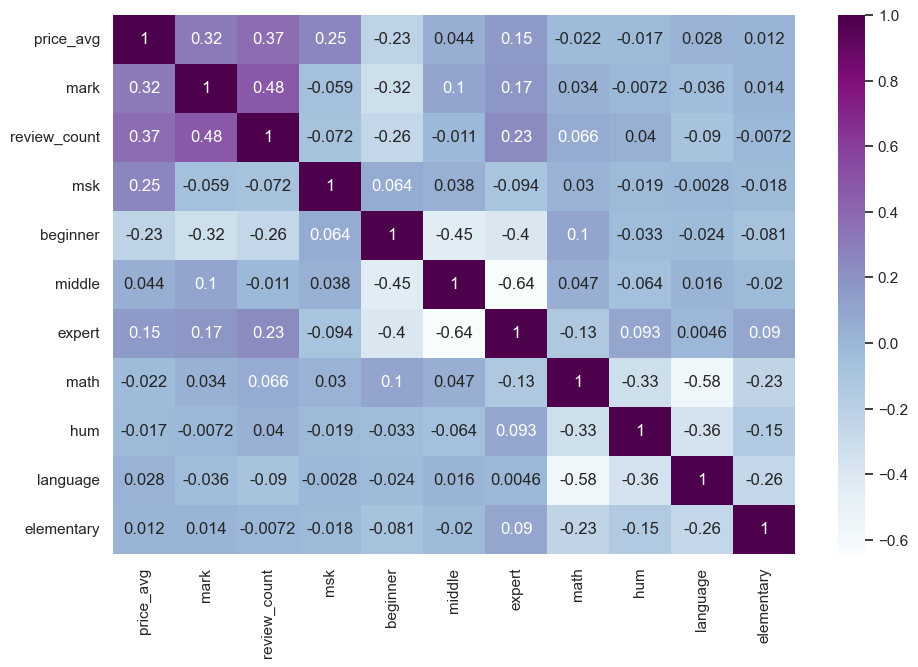

In [101]:
plt.figure(figsize=(11, 7))
sns.heatmap(repetitors_without_descr.corr(), annot=True, cmap='BuPu')
plt.show()

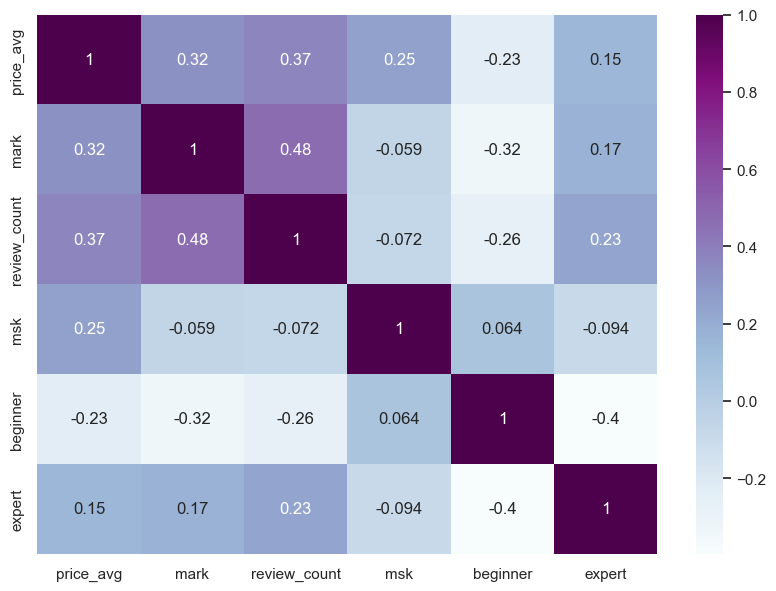

In [103]:
# Без предметов
repetitors_without_descr = repetitors_without_descr.drop(['math','hum','language',
                                            'elementary', 'middle'], axis=1)

plt.figure(figsize=(10, 7))
sns.heatmap(repetitors_without_descr.corr(), annot=True, cmap='BuPu')
plt.show()

## Графики о количестве значений

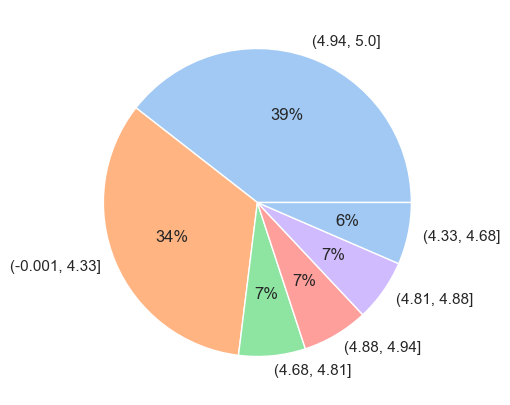

In [104]:
plt.figure(figsize=(10,5))
plt.pie(repetitors['segment_mark'].value_counts(),
        labels = repetitors['segment_mark'].value_counts().index, 
        colors = sns.color_palette('pastel')[0:5], 
        autopct='%.0f%%')
plt.show()

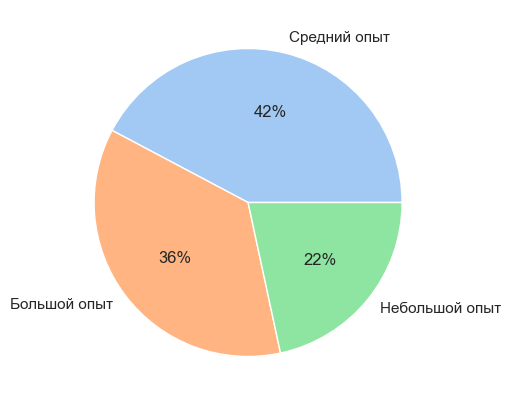

In [105]:
plt.pie(repetitors['experience_name'].value_counts(),
        labels = repetitors['experience_name'].value_counts().index, 
        colors = sns.color_palette('pastel')[0:5], 
        autopct='%.0f%%')
plt.show()

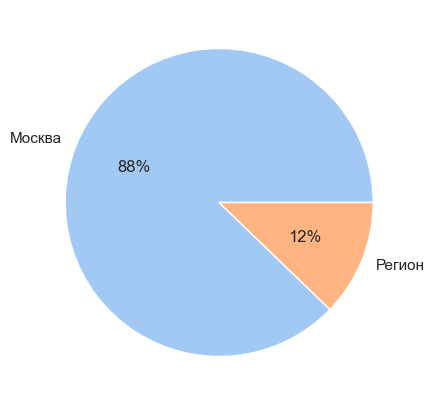

In [106]:
plt.pie(repetitors['city_name'].value_counts(),
        labels = repetitors['city_name'].value_counts().index, 
        colors = sns.color_palette('pastel')[0:5], 
        autopct='%.0f%%')
plt.show()

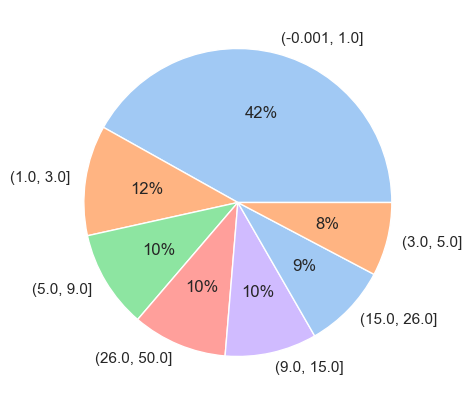

In [107]:
sns.set_theme(style="white", palette='flare')
plt.pie(repetitors['segment_reviews'].value_counts(),
        labels = repetitors['segment_reviews'].value_counts().index, 
        colors = sns.color_palette('pastel')[0:5], 
        autopct='%.0f%%')
plt.show()

# Сохраняем данные для дальнейшего анализа

In [108]:
repetitors.to_csv(r'repetitors.csv', index= False)

In [110]:
repetitors.drop(['link','name','description',
                 'subject_name','experience_name','city_name',
                 'price','segment_mark','segment_reviews'], axis=1)[:5]

,price_avg,mark,review_count,descr_preproc,msk,beginner,middle,expert,math,hum,language,elementary
0,1700.0,0.00,0.0,чжу юцзить проводить дистанционный китайский о...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,866.0,4.67,3.0,ошлыковый ольга борисович литература образован...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1000.0,5.00,1.0,бредкин александр геннадиевич немецкий экономи...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,700.0,0.00,0.0,кудрявцев виктор николаевич химия биология мгу...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1000.0,4.50,4.0,хахалин иван сергеевич физика математик информ...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [111]:
len(repetitors)

86769

In [112]:
repetitors.drop(['link','name','description','experience_name',
                 'subject_name','city_name','price',
                 'segment_mark', 'segment_reviews', 
                 'math', 'hum','language','elementary'], axis = 1).to_csv(r'repetitors_without_subj.csv', 
                                                                         index= False)